# **Osztályozás**
Készítette: *Fogarassyné Vathy Ágnes*

## **1. Titanic adathalmaz bemutatása és általános előkészítése**

Az adathalmaz 888 darab személy adatait tartalmazza, akik a Titanic-on tartózkodtak, amikor a katasztrófa bekövetkezett.

Oszlopok nevei és típusai:
1. Survived: 0 vagy 1-es értéket vesz fel, az alapján hogy az adott személy túlélte-e a katasztrófát vagy sem --> int64
2. Pclass: 1, 2 vagy 3-as értéket vehet fel, az alapján, hogy az adott személy milyen osztályon utazott --> int64
3. Name: az adott illető nevét tartalmazza --> object (string)
4. Sex: male, vagy female-t vesz fel. Személy neme --> object (string)
5. Age: személy életkora --> float64
6. Siblings/Spouses Aboard: megmutatja, hogy az adott illetőnek mennyi testvére van a fedélzeten, vagy házastárssal utazik-e --> int64
7. Parents/Children Aboard: megmutatja, hogy az adott személynek a szülei/gyermekei közül mennyien tartózkodnak a fedélzeten -->i nt64
8. Fare: mennyit fizetett a jegyért --> float64

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Block 1.1** Az adatok beolvasása:

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

# DataFrame létrehozása Excel fájlból
titanic = pd.read_excel('Titanic.xlsx')

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


**Block 1.2** Adatelőkészítő lépésként:
- dobjuk el a *Name* oszlopot
- konvertáljuk dummy változóvá a *Sex* oszlopot

In [7]:
# Name oszlop eldobása
titanic.drop(labels='Name', axis=1, inplace=True)

# A Sex oszlop dummy váltóvá konvertálása  (referencia kódolással)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,True,22.0,1,0,7.2500
1,1,1,False,38.0,1,0,71.2833
2,1,3,False,26.0,0,0,7.9250
3,1,1,False,35.0,1,0,53.1000
4,0,3,True,35.0,0,0,8.0500


## **2. Titanic adathalmaz előkészítése az osztályozáshoz**

**Block 2.1** Az osztályozási feladat előkészítéseként:
- mentsük ki egy *features* változóba egy listába a prediktív változók neveit,
- a *classlabel* változó egy egy elemű listában tartalmazza az osztálycímkének választott változó nevét


In [8]:
classlabel = list(titanic.columns[:1])
features = list(titanic.columns[1:])

print("Osztálycímke:", classlabel, "\n")
print("leíró változók:", features)

Osztálycímke: ['Survived'] 

leíró változók: ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


**Block 2.2** Alakítsuk ki az osztályozáshoz szükséges **$X$** (imput adatok) és **$y$** (output értékek) **adattömböket**!

In [9]:
# DataFrame-et TULAJDONSÁGOK(features, X) és CÉL(target, y) tömbökre bontjuk
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

print(X)
print(y)

[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [3 False 7.0 1 2 23.45]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0

**Block 2.3** Tréning és teszt adathalmazok kialakítása 2/3 - 1/3 arányban (mind az **$X$**, mind az **$y$** adatokra vonatkozóan):

In [10]:
# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

**Block 2.4** Némely osztályozó használatához át kell skáláznunk a bementi adatokat, így tegyük ezt is meg!

In [11]:
# Input adatok skálázása a [0,1] tartományra
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **3. Modellek bemutatásai és implementációi**

### **3.1. Döntési fa osztályozó**

A döntési fákat a **[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** osztály segítségével valósíthatunk meg.

*Fontosabb paraméterek:*

- *criterion*: teszt az attribútumok kiválasztásához
    * "gini": Gini-index
    * "entropy": Információ nyereség
- *max_depth*: a fa maximális mélysége
- *min_samples_split*: minimális elemszám, ami ahhoz szükséges, hogy egy belső csúcsot tovább bontson az algoritmus
- *min_samples_leaf*: minimális elemszám ahhoz, hogy egy csomópont levél lehessen
- *max_leaf_nodes*: maximális levélszám

*Fontosabb attribútum:*

- *feature_importances_*: a feature importance értékek

#### __3.1.1 Alapmodell - alapok__

**Block 3.1** Paraméterek nélküli modell létrehozása:
- az osztály példányosítása

In [12]:
# új osztályozó létrehozása:
clf_dtree = DecisionTreeClassifier()
print(clf_dtree)

DecisionTreeClassifier()


- a modell tanítása a tréning adatokon:

In [13]:
# A modell illesztése
clf_dtree = clf_dtree.fit(X_train,y_train)

- a modell használata a teszt adathalmaz osztálycímkéjére vonatkozóan:

In [14]:
# Az illesztett modell használata a teszt adatokon
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_dtree

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

- a modell pontosságának (accuracy) kiértékelése a teszt adatokon:

In [15]:
# A modell pontosságának kiértékelése a teszt adatokon
print("Paraméterek nélküli pontosság:",clf_dtree.score(X_test, y_test))

# De akár így is kiértékelhettük volna:
#print("Paraméterek nélküli pontosság:",accuracy_score(y_test, y_pred_dtree))

Paraméterek nélküli pontosság: 0.7952218430034129


#### __3.1.2 Kiértékelés__

**Block 3.2** A modell kiértékelése **különféle metrikák** alapján:

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Sensitivity:", recall_score(y_test, y_pred_dtree))
print("Specificity:", recall_score(y_test, y_pred_dtree, pos_label=0))
print("F1:", f1_score(y_test, y_pred_dtree))
print("AUC:", roc_auc_score(y_test, y_pred_dtree))

Accuracy: 0.7952218430034129
Sensitivity: 0.7876106194690266
Specificity: 0.8
F1: 0.7478991596638656
AUC: 0.7938053097345134


**Block 3.3** Egy összegző iértékelés:

In [17]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       180
           1       0.71      0.79      0.75       113

    accuracy                           0.80       293
   macro avg       0.78      0.79      0.79       293
weighted avg       0.80      0.80      0.80       293



**Block 3.4** A paraméteres modellhez tartozó **keveredési mátrix** kiíratása:

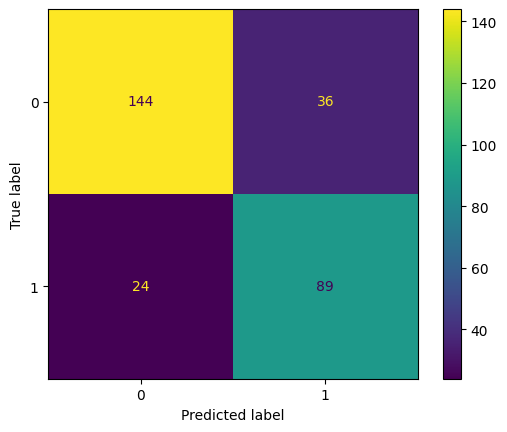

In [18]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree)
disp.plot()

#### __3.1.3 Felparaméterezett döntési fa__

**Block 3.5** Egy felparaméterezett döntési fa létrehozása és kiértékelése:



In [19]:
clf_dtree2 = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
clf_dtree2 = clf_dtree2.fit(X_train,y_train)
print("A megadott paraméterek mellet a modell pontossága:",clf_dtree2.score(X_test, y_test))

A megadott paraméterek mellet a modell pontossága: 0.8327645051194539


**Block 3.6** A döntési fa **grafikus megjelenítése** a **graphviz** csomag használatával:


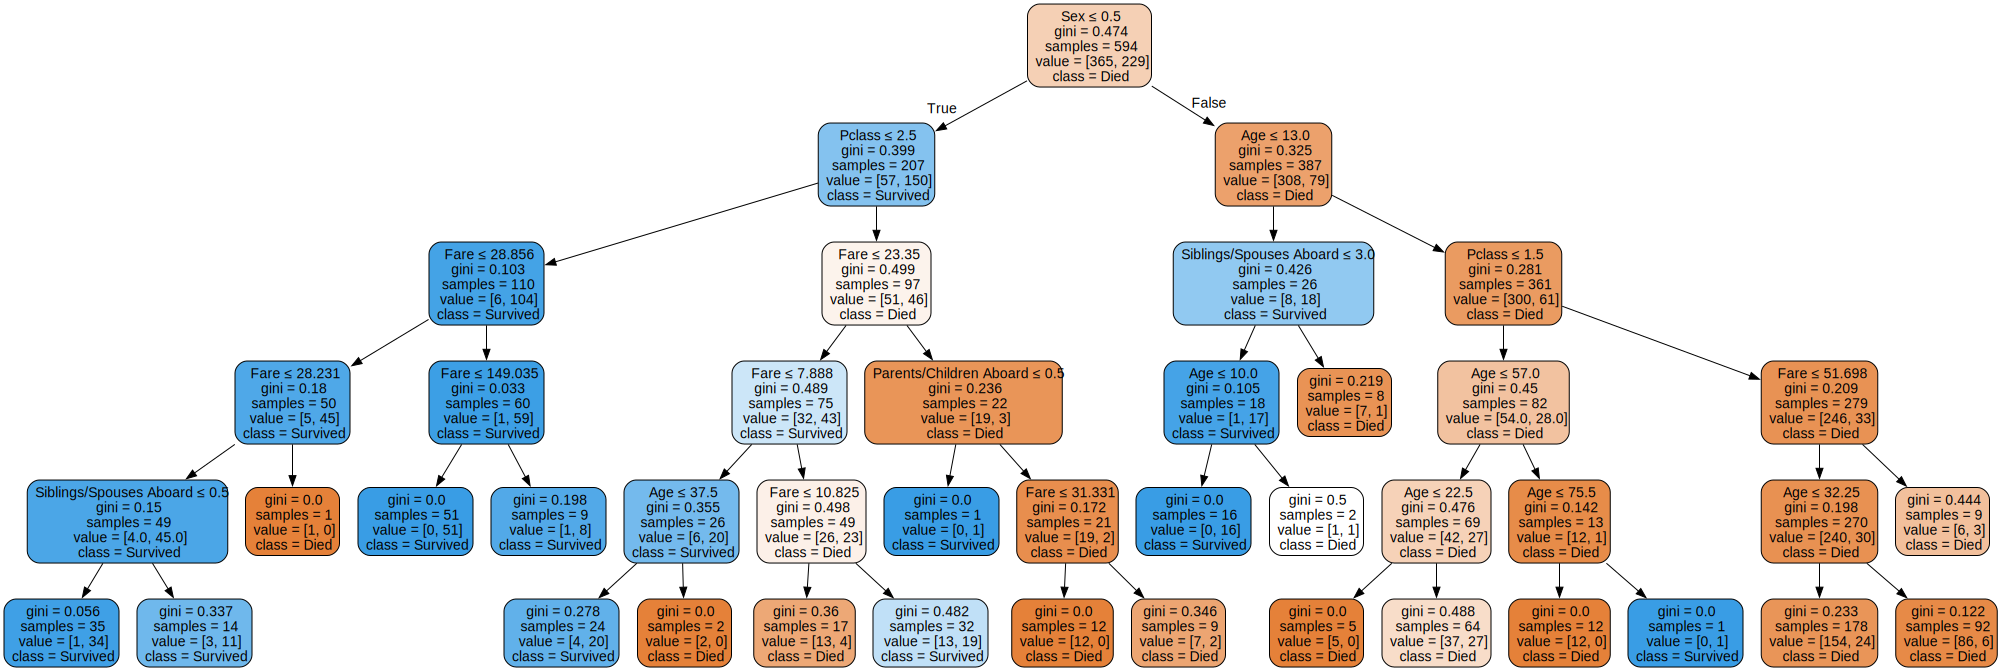

In [20]:
dot_data = export_graphviz(clf_dtree2, out_file=None,
                      feature_names=features,
                      class_names=["Died", "Survived"],
                      filled=True,
                      rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

A döntési fa vizalizálása a **[dtreeviz](https://github.com/parrt/dtreeviz)** csomaggal is megoldható.

### **3.2. Naív Bayes osztályozó**

Naív Bayes osztályozót a **[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)** osztály segítégével valósíthatunk meg.

*Fontosabb paraméterek:*

- *priors*: prior valószínűségek, ezzel megadhatjuk, hogy milyen előzetes valószínűséget feltételezünk az egyes osztályokra vonatkozóan.
- *var_smooothing*: növeli az algoritmus stabilitását azáltal, hogy a nullával való szorzás helyett, nagyon kicsi számmal szoroz, így nem nulláz le valószínűségeket

*Fontosabb attribútumok:*

- *class_count_*: tréning minták száma az egyes osztályokban
- *class_prior_*: az egyes osztályok valószínűsége
- *classes_*: az osztályozó által talált osztálycímkék
- *sigma_*: a leíró tulajdonságok osztályonkénti varianciája

**Block 3.8** Paraméterek nélküli modell létrehozása, illesztése, kiértékelése:

In [21]:
# Modell létrehozása és illesztése
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train.ravel()) # a .ravel "kilapitja" a numpy arrayt egy 1 dimenziós tömbbé (akkor is kell ha alapból 1 dimenziós a tömb)

,priors,None
,var_smoothing,1e-09


In [22]:
# Osztálycímke "jóslása"
y_pred_gnb = clf_gnb.predict(X_test)
print(y_pred_gnb)

[1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [23]:
# Modell kiértékelése
print("A modell pontossága:", clf_gnb.score(X_test,y_test))

A modell pontossága: 0.8191126279863481


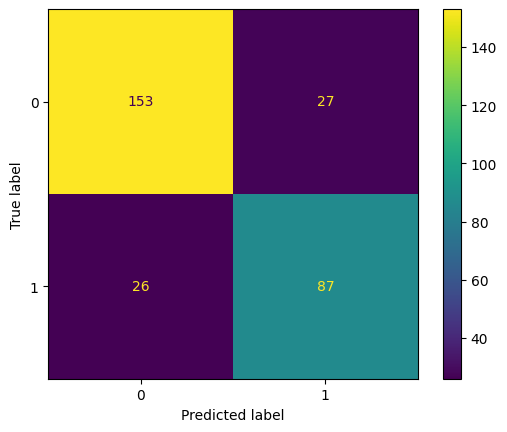

In [24]:
# Keveredési mátrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
disp.plot()

**Block 3.9** Írassuk ki a naív Bayes osztályozó néhány jellemző tulajdonságát!

In [25]:
print("Minták száma az osztályokban:", clf_gnb.class_count_)
print("Az osztályok valószínűsége:", clf_gnb.class_prior_)
print("Osztálycímkék:", clf_gnb.classes_)

Minták száma az osztályokban: [365. 229.]
Az osztályok valószínűsége: [0.61447811 0.38552189]
Osztálycímkék: [0 1]


**Block 3.10** Nézzük meg, hogy változik-e az osztályozás pontossága, ha megadunk prior valószínűségeket az osztályokba való tartózásra vonatkozóan!

In [26]:
model_gnb1 = GaussianNB(priors=[0.20, 0.80])
model_gnb1 = model_gnb1.fit(X_train, y_train.ravel())
print("A modell pontossága prior valószínűségek megadásával:", model_gnb1.score(X_test,y_test))

A modell pontossága prior valószínűségek megadásával: 0.7610921501706485


### **3.3 k-legközelebbi szomszéd osztályozó**

A $k$-NN osztályozót a **[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** osztály segítégével valósíthatunk meg.

*Fontosabb paraméterek:*

- *n_neighbors*: a szomszédok száma
- *weights*: súlyozás
    * 'uniform': nincs súlyozás
    * 'distance': a távolság inverzével arányos súlyozás
    * [callable]: felhasználó által megadható súlyfüggvény
- *metric*: az alkalmazandó távolságmetrika
    * alapértelmezett értéke "minkowski"
- *p*: a minkowski távolság $p$ értéke (p=1 -> manhattan; p=2 euklideszi)
    * alapértelmezett értéke: 2

**Block 3.11** A $k$-nn modell létrehozása, illesztése, jóslás és kiértékelése. Figyeljünk rá, hogy a $k$-nn osztályozót az **átskálázott adatokon hozzuk létre**!

In [27]:
# Modell létrehozása és illesztése
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train.ravel())

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
# Osztálycímke "jóslása"
y_pred_knn = clf_knn.predict(X_test_scaled)
print(y_pred_knn)

[1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [29]:
# Modell kiértékelése
print("A modell pontossága:", clf_knn.score(X_test_scaled,y_test))

A modell pontossága: 0.8395904436860068


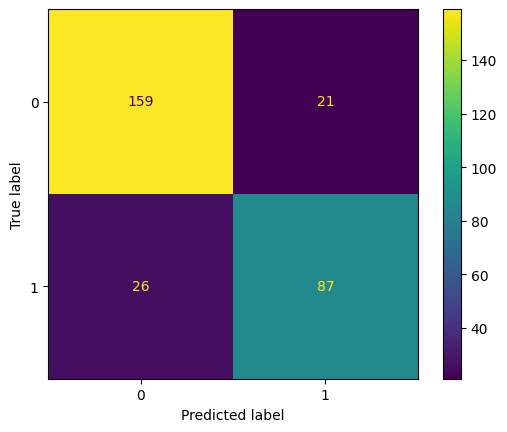

In [30]:
# A modellhez tartozó keveredési mátrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

### **3.4. Support Vector osztályozó**

Az **[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** osztályozónak számos paraméterezési lehetősége van, melyek jelentős része a *kernel*-től függ. Részletesebben lásd a dokumentációban.

**Block 3.12** A modell létrehozása, illesztése és kiértékelése:

In [31]:
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, y_train.ravel())

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
# Osztálycímke "jóslása"
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
# Modell kiértékelése
print("A modell pontossága:", clf_svm.score(X_test,y_test))

A modell pontossága: 0.689419795221843


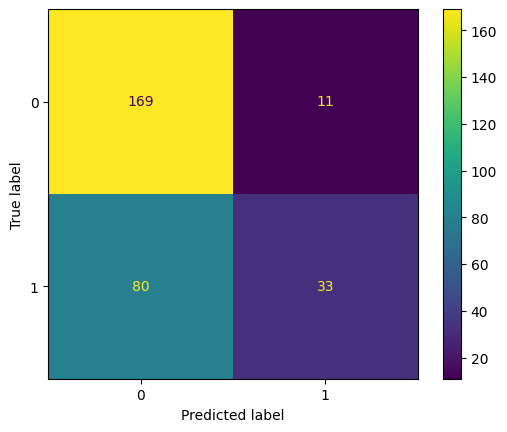

In [34]:
# Keveredési mátrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()

### **3.5 Logisztikus regresszió**

Logisztikus regresszión alapuló osztályozót a **[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** osztály segítégével valósíthatunk meg.

*Fontosabb paraméterek:*

- *penalty*: a regularizációhoz alkalmazott bűntetés,
    * 'l1': L1 regularizáció
    * 'l2': L2 regularizáció (default)
    * 'elasticnet': Elastic Net regularizáció
    * 'none': nincs regularizáció
- *solver*: az optimalizáló, ami megoldja az illesztést - az egyes optimalizáló meghatározza az alkalmazható bűntetést is:
    * 'newton-cg': [‘l2’, ‘none’]
    * 'lbfgs': [‘l2’, ‘none’] (default)
    * 'liblinear': [‘l1’, ‘l2’]
    * 'sag': [‘l2’, ‘none’]
    * 'saga': [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

Az optimalizációk eltérően teljesítenek különféle adathalmazok esetén. Részletesebben lást a [dokumentációban](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


**Block 3.13** A logisztikus regresszió létrehozása, illesztése és kiértékelése:

In [35]:
# új osztályozó létrehozása:
clf_logreg = LogisticRegression(max_iter=200)

# Modell illesztése a tréning adatokon
clf_logreg.fit(X_train, y_train.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [36]:
# Osztálycímke "jóslása"
y_pred_logreg = clf_logreg.predict(X_test)
print(y_pred_logreg)

[1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]


In [37]:
# Modell kiértékelése
print("A modell pontossága:", clf_logreg.score(X_test,y_test))

A modell pontossága: 0.8361774744027304


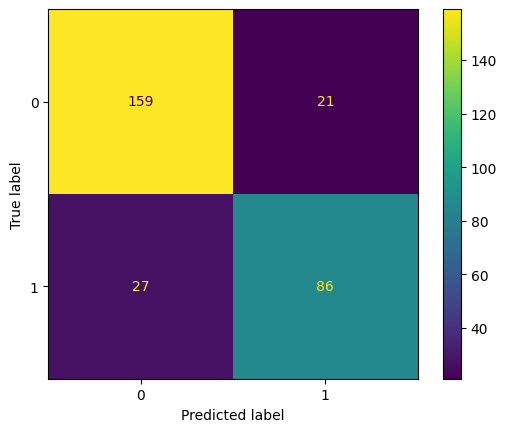

In [38]:
# Keveredési mátrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot()

### **3.6 MLPClassifier**

Az **[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)** a neurális hálók családjába tartozik, amely egy több rétegű perceptron algoritmust implementál. Tanítása Backpropagation-nel történik.
  
MLPClassifier használatának:

    1. előnyei:
        - képes nem lineáris modellek megtanulására
        - képes valós idejű tanulásra a partial_fit metódus segítségével
        
    2. hátrányai:
        - nagyon érzékeny a feature scalingre
        - hiperparaméter hangolása nagyon sok időt tud elvenni
        - csak egyetlen egy aktivációs függvényt lehet használni az összes hidden_layeren keresztül

**Főbb paraméterek:**
- *hidden_layer_size* =(csomópontok száma, hidden layerek száma) : számos elmélet létezik, hogy hogyan is érdemes megválasztani az ideális mennyiségű rétegszámot, illetve a rétegenkénti csomópontok számát...
    Többnyire elég egy hidden layert beiktatnunk. Általánosságban a következő érvényes a csomópontok számának meghatározásakkor: meg kell néznünk, hogy mennyi csomópontunk van a bemeneti  rétegben (mennyi feature oszlopunk van),
    utána mennyi van a kimeneti rétegben( ha az NN bináris classifier, akkor elég 1 csomópont), és e két érték közötti intervallumból kell választanunk ( szokás az input és output layerek átlagát venni is).
    
    A mi esetünkben --->
        - bemeneti csomópontok : 6 darab feature oszlopunk van
        - kimeneti csomópontok : 1 darab, mert bináris osztályozót építünk
    Emiatt 1 < hidden layer csomópontok száma < 6. ---> Vegyük 1 és 6 átlagát ---> 3.5 ~ 4    
    
    Tehát hidden_layer_size(4,)
    
    Fontos megjegyezni, hogy a Deep Learning világában csak teóriák léteznek a korábban említett paraméter pontos megállapításához.
    

**Főbb paraméterek:**
- *activation*: aktivációs függvények a hidden layer(ek) számára

    - relu : ectified linear unit aktiváció, visszaadja f(x) = max(0, x)
    - tanh : hiperbolikus tangens függvény, visszaadja f(x) = tanh(x)
    - logistic : logisztikus sigmoid függvény, visszaadja f(x) = 1 / (1 + exp(-x))
    - identity : visszaadja f(x) = x

- *batch_size*: batch mérete

- *solver* = ... : súly optimalizáláshoz használt 'megoldók'
    - adam : stochastic gradient alapú optimalizáló
    - sgd : stochastic gradient descent
    - lbfgs : quasi-Newton methods családba tartozó optimalizáló
    
    Fontos megjegyezni, hogy az ADAM optimalizáló nagyon jól működik nagy méretű adathalmazokon (több ezer rekord..), ezzel szemben az LBFGS optimalizáló rendkívűl gyorsan konvergál a jó megoldás felé és nagyon jól teljesít kisebb adathalmazokon.
    
    Számunkra kevesebb, mint 1000 rekord áll rendelkezésre, ezért nagy valószínűséggel az LBFGS optimalizáló lesz az ideális.

- *max_iter* = ... : maximum iterációk száma
    - az optimalizáló iterációszáma, addig iterál, míg nem egyenlő nem lesz ezzel az értékkel
    - stochasztikus optimalizálóknál (sgd, adam) ez az epoch számát jelenti

- *learning_rate*: a súlyok módosításakor használatos tanulási ráta
    - csak *sgd*, vagy *adam* solverek esetén használatos

- *shuffle*: iterációkként megtörténjen-e a minták keverése
    - csak *sgd*, vagy *adam* solverek esetén használatos

- *warm_start*: True érték esetén az előző illesztés eredményét használja inicializációként
    - az optimalizáló iterációszáma, addig iterál, míg nem egyenlő nem lesz ezzel az értékkel
    - stochasztikus optimalizálóknál (sgd, adam) ez az epoch számát jelenti

- *early_stopping*: True esetén early stopping kerül alkalmazásra
    - leállítja a tanulást, ha a validációs hiba nem javul *n_iter_no_change* egymást követő iteráción keresztül
    - True érték esetén a tréning halmazból automatikusan leválaszt 10%-nyi mintát a validációhoz. Ha ettől eltérő méretű validációs halmazt szeretnénk beállítani, akkor ezt a *validation_fraction* paraméterben állíthatjuk be
    - csak *sgd*, vagy *adam* solverek esetén van hatása

- *alpha* = ... : L2 regularizációs paraméter. A súlyok nullától való eltérésértékének négyzetével „büntet” (a költségfüggvényben jelenik meg).
    - Alapértelmezett érték: 0.0001

**fontosabb attribútumok**
- coefs_: az edzett hálózat súlyai
- intercepts_: az edeztt hálózat bias értékei
- n\_iter_: a tanításhoz használt iterációk száma

**Block 3.14** Alapértelmezett paraméterekkel futassuk le az MLPClassifiert a Titanic adathalmazunkon:

In [45]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train_scaled, y_train.ravel())

/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,0


A modell illesztése a teszt halmazon és a prediktált osztáylcímkék kiírása

In [46]:
# Modell alkalmazása a teszt adatokon
y_pred_nn = clf_nn.predict(X_test_scaled)
print(y_pred_nn)

[1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


A modell kiértékelése:

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Sensitivity:", recall_score(y_test, y_pred_nn))
print("Specificity:", recall_score(y_test, y_pred_nn, pos_label=0))
print("F1:", f1_score(y_test, y_pred_nn))
print("AUC:", roc_auc_score(y_test, y_pred_nn))

print(classification_report(y_true=y_test, y_pred=y_pred_nn))

Accuracy: 0.8498293515358362
Sensitivity: 0.7522123893805309
Specificity: 0.9111111111111111
F1: 0.794392523364486
AUC: 0.831661750245821
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       180
           1       0.84      0.75      0.79       113

    accuracy                           0.85       293
   macro avg       0.85      0.83      0.84       293
weighted avg       0.85      0.85      0.85       293



A kiértékeléshez tartozó keveredési mátrix:

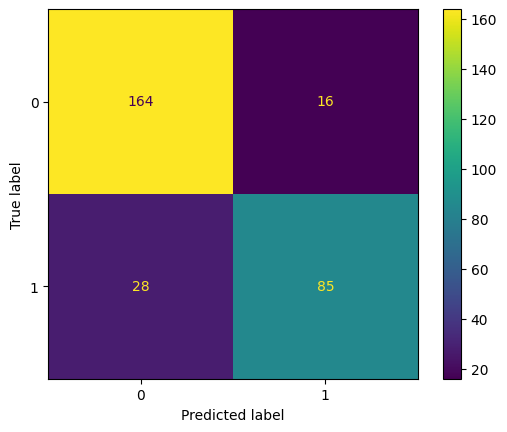

In [49]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()

**Block 3.15** Elsőre, a paraméterek alapbeállítása mellet is viszonylag jó eredményt értünk el (bár a modellünk nem konvergált)... Próbáljunk minél jobb modellt építeni a neurális háló paramétereinek hangolásával!:

Accuracy: 0.8498293515358362
Sensitivity: 0.7433628318584071
Specificity: 0.9166666666666666
F1: 0.7924528301886793
AUC: 0.8300147492625369


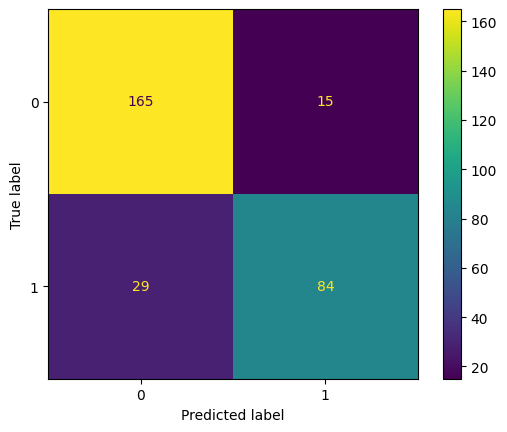

In [50]:
clf_nn2 = MLPClassifier(
                    hidden_layer_sizes=(4,4),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.001,
                    random_state=0)

clf_nn2.fit(X_train_scaled, y_train.ravel())
y_pred_nn2 = clf_nn2.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_nn2))
print("Sensitivity:", recall_score(y_test,y_pred_nn2))
print("Specificity:", recall_score(y_test, y_pred_nn2, pos_label=0))
print("F1:", f1_score(y_test, y_pred_nn2))
print("AUC:", roc_auc_score(y_test, y_pred_nn2))

cm_nn2 = confusion_matrix(y_test, y_pred_nn2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn2)
disp.plot()

**Block 3.16** Írassuk ki a hálózat:
- rétegeinek számát,
- a kimeneti réteg aktivációs függvényét,
- az edzett hálózat súlyértékeit,
- az edzett hálózat bias értékeit!

In [51]:
print ("A rétegek száma (beleértve az input és output réteget is): ", clf_nn2.n_layers_)
print ("Kimeneti réteg aktivációs fv-e: ", clf_nn2.out_activation_)
print ("Az iterációszám: ", clf_nn2.n_iter_)
print ("\A súlyok: ", clf_nn2.coefs_)
print ("\A bias-ok: ", clf_nn2.intercepts_)

A rétegek száma (beleértve az input és output réteget is):  4
Kimeneti réteg aktivációs fv-e:  logistic
Az iterációszám:  112
\A súlyok:  [array([[-1.81620212,  0.81460383,  0.17713178,  0.14194605],
       [-2.5653451 ,  0.29569951, -0.537951  ,  1.27866225],
       [ 2.4339922 ,  9.39102212,  0.46337415,  7.63834511],
       [ 0.33697782,  4.60688488, -0.7002501 ,  3.05704095],
       [-1.40350979, -2.30486201,  0.95667208, -1.01215246],
       [ 0.3705638 , -0.16971977, -0.03559148, -1.11480753]]), array([[ 0.03125515, -4.06752706, -0.40453601,  0.45500796],
       [-0.59861933,  2.09738721, -0.82680608,  0.17519236],
       [ 0.19260071,  0.88242611,  0.76243939,  0.31240013],
       [-1.21501933, -0.86662599,  0.33956611, -0.76537453]]), array([[-0.1982602 ],
       [-0.52398406],
       [ 0.15256186],
       [-0.12736871]])]
\A bias-ok:  [array([ 2.1675607 ,  2.89764188, -0.70696286,  0.53198442]), array([-1.01650432, -1.26820274, -0.50163212, -0.64979759]), array([3.23552641])]


<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
/var/folders/p9/yfdwydy169s3mz1hd23bwrtw0000gn/T/ipykernel_12015/3684710109.py:4: SyntaxWarning: invalid escape sequence '\A'
  print ("\A súlyok: ", clf_nn2.coefs_)
/var/folders/p9/yfdwydy169s3mz1hd23bwrtw0000gn/T/ipykernel_12015/3684710109.py:5: SyntaxWarning: invalid escape sequence '\A'
  print ("\A bias-ok: ", clf_nn2.intercepts_)
